# Лекция 3: Библиотеки для глубинного обучения. Примитивы фреймворка Pytorch. 

#        Пример обучения нейронной сети в numpy

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):

    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    
    y_pred = h_relu.dot(w2)

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    
    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

# Первая и основная составляющая типичного современного фреймворка для машинного обучения - Tensor

В интерфейсе базовых операций тензор ничем не отличается от np.array, но при этом тензоры можно эффективно использовать при обучении на gpu. 

In [2]:
import torch

In [3]:
# Создаем неинициализированный тензор
x = torch.Tensor(5, 3)

In [7]:
x


 0.0000e+00 -4.6566e-10  0.0000e+00
-4.6566e-10  1.2612e-44  1.1614e-41
 0.0000e+00  2.2369e+08  0.0000e+00
 0.0000e+00  1.4349e-42  1.4349e-42
        nan         nan -1.2287e+03
[torch.FloatTensor of size 5x3]

In [8]:
# Типы
torch.FloatTensor
torch.LongTensor

torch.LongTensor

In [9]:
x = torch.Tensor(5, 3).type(torch.FloatTensor)

In [10]:
# инициализируем тензор нормальным распределением
x = torch.randn(5, 3)

In [6]:
x


 0.4182  0.7082  0.2494
 0.7768  0.2455  0.5667
 0.9181  0.8303  0.0754
 0.2917  0.0540  0.5722
 0.8588  0.4882  0.1710
[torch.FloatTensor of size 5x3]

In [10]:
x.shape

torch.Size([5, 3])

In [12]:
x.size()

torch.Size([5, 3])

In [8]:
y = torch.rand(5, 3)

In [9]:
y


 0.7304  0.9615  0.2586
 0.3227  0.7867  0.0043
 0.8287  0.2735  0.0115
 0.2667  0.1086  0.5766
 0.4664  0.3912  0.6080
[torch.FloatTensor of size 5x3]

In [10]:
# Первый способ сложить 2 тензора
x + y


 1.1486  1.6697  0.5079
 1.0996  1.0322  0.5710
 1.7468  1.1038  0.0869
 0.5584  0.1626  1.1488
 1.3252  0.8794  0.7790
[torch.FloatTensor of size 5x3]

In [11]:
# Второй способ сложить 2 тензора
x.add(y)


 1.1486  1.6697  0.5079
 1.0996  1.0322  0.5710
 1.7468  1.1038  0.0869
 0.5584  0.1626  1.1488
 1.3252  0.8794  0.7790
[torch.FloatTensor of size 5x3]

In [12]:
# А еще можно так:
torch.add(x, y)


 1.1486  1.6697  0.5079
 1.0996  1.0322  0.5710
 1.7468  1.1038  0.0869
 0.5584  0.1626  1.1488
 1.3252  0.8794  0.7790
[torch.FloatTensor of size 5x3]

In [13]:
# Сохраняем выход в тензор result
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)


 1.1486  1.6697  0.5079
 1.0996  1.0322  0.5710
 1.7468  1.1038  0.0869
 0.5584  0.1626  1.1488
 1.3252  0.8794  0.7790
[torch.FloatTensor of size 5x3]

In [14]:
# Перевод из numpy в torch
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b) 

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [13]:
a = torch.randn(5, 3) 
b = torch.randn(3, 4)

In [14]:
# Матричное умножение

torch.mm(a,b)
a.mm(b)


 0.0066  0.3046 -0.3341 -0.2476
-0.5096 -1.7409  1.0363  0.2693
 0.3572  0.6899 -0.3999  0.0469
-0.2880 -4.0160  0.6312  0.0274
-0.0236 -0.3690 -0.0141 -0.0531
[torch.FloatTensor of size 5x4]

In [17]:
# для python 3

a @ b


 6.4576  2.0158 -0.4964  5.6783
 2.9732  0.9977 -0.2714  2.6477
 1.7898  1.6968  1.3408  0.8617
 0.0795  1.6087  2.7669 -1.3341
-1.3793 -0.9641 -1.4624 -0.3738
[torch.FloatTensor of size 5x4]

Поменяем пару строчек в обучении на np и код уже можно запускать и на GPU

In [ ]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6
for t in range(500):

    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

# Но самое важное в фреймворках - графы вычисления и автоматическое дифференцирование 

In [13]:
# Variable - обертка над тензором, содержащая значения градиента и еще немного полезной информации
import torch
from torch.autograd import Variable
x = Variable(torch.ones(2, 2), requires_grad = True)
x  

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [14]:
x.data


 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [20]:
x.grad

Variable containing:
 0.2500  0.2500
 0.2500  0.2500
[torch.FloatTensor of size 2x2]

In [16]:
# производная операции, которая породила переменную.
x.grad_fn

In [22]:
y = x + 2
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [19]:
z = y.mean()
z.backward()

В новой версии pytorch промежуточные градиенты не сохраняются.
Но если мы хотим все-таки увидеть их значения можно использовать
функцию variable.register_hook(print)
или использовать Variable.retain_grad()

In [20]:
from __future__ import print_function
print (y.grad is None)
y.register_hook(print)

True


In [21]:
z = y * y * 2
z
print (z.grad is None)
z.register_hook(print)

True


In [22]:
out = z.mean()
out

Variable containing:
 18
[torch.FloatTensor of size 1]

In [23]:
# Запускаем бэкпроп
# На выходе получаем градиенты из хуков
out.backward()

Variable containing:
 0.2500  0.2500
 0.2500  0.2500
[torch.FloatTensor of size 2x2]

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [24]:

x.grad

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [72]:
v = torch.autograd.Variable(torch.randn(3), requires_grad=True)
v2 = v+1
v2.retain_grad()
v2.sum().backward()
v2.grad

Variable containing:
 1
 1
 1
[torch.FloatTensor of size 3]

# Что произошло?

autograd строит ациклический граф вычисления из переменных и операций (функций)
out.backward проходит по всему графу начиная от вершины out и считает градиенты вершин

Если мы хотим сохранить значения переменных в графе, то используем retain_graph = True. 
Это может быть нужно, если мы хотим несколько раз подряд сделать backprop

In [70]:
f = Variable(torch.Tensor([2,3]), requires_grad=True)
g = f[0] * f[1]
g.backward(retain_graph=True)
f.grad
g.backward()
f.grad

Variable containing:
 6
 4
[torch.FloatTensor of size 2]

In [ ]:
f = Variable(torch.Tensor([2,3]), requires_grad=True)
g = f[0] * f[1]
g.backward()
f.grad
g.backward()
f.grad

In [ ]:
x = Variable(torch.ones(2, 2), requires_grad = True)
y = x + 2
y.backward(torch.ones(2, 2), retain_graph=True)
x.grad



In [35]:
class MyReLU(torch.autograd.Function):

    def forward(self, input):
        # forward pass
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        # backward pass
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input



# Снова вернемся к исходной двухслойной сети

In [ ]:
import torch
from torch.autograd import Variable

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10


x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)


w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss.data[0])
    
    # Обнуляем градиенты
    if w1.grad is not None:
        w1.grad.data.zero_()
    if w2.grad is not None:
        w2.grad.data.zero_()

    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

# Наконец, в PyTorch базовые слои нейронных сетей уже реализованы.

In [ ]:
from torch.autograd import Variable

N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    model.zero_grad()

    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

In [87]:
loss_fn(model(x), y)

Variable containing:
1.00000e-12 *
  1.6793
[torch.FloatTensor of size 1]

# А еще там есть уже готовые оптимизаторы, такие как GD, SGD, ADAM, etc.

In [ ]:
N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out),

        )
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

In [6]:
sgd = torch.optim.SGD
adadelta = torch.optim.Adadelta
adagrad = torch.optim.Adagrad
rmsprop = torch.optim.RMSprop

# Сохранение и загрузка модели

In [51]:
class Test(torch.nn.Module):
    def __init__(self, A):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(Test, self).__init__()
        self.linear1 = torch.nn.Linear(A, A)
        self.linear2 = torch.nn.Linear(A, A)

    def forward(self, x, n_layers):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        x = self.linear1(x)
        if n_layers == 2:
            print(1)
            x = self.linear2(x)
        return x.mean()

model = Test(5)
opt = torch.optim.Adam(model.parameters())

In [52]:
inp = Variable(torch.Tensor(5,5))
f = model.forward(inp, 1)
f.backward()
opt.step()

In [53]:
# Сохранение

def save_checkpoint(state, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
epoch =1    

In [54]:
save_checkpoint({
            'epoch': epoch,
            'state_dict': model.state_dict(),
            'optimizer' : opt.state_dict(),
        })

In [55]:
# Пример загрузки
model = Test(5)
opt = torch.optim.Adam(model.parameters())

checkpoint = torch.load('checkpoint.pth.tar')
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['state_dict'])
opt.load_state_dict(checkpoint['optimizer'])

In [56]:
f = model.forward(inp, 2)
f.backward()
opt.step()

1


# Модели с произвольно сложной архитектурой

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = 
        self.layer2 = 

    def forward(self, x):
        pass

## Datasets and Dataloaders

Важная составляющая машинного обучения - работа с данными (загрузка, предобработка, аугментация). PyTorch имеет встроенные средства для этих операций.


Разберем эти операции на примере датасета особых точек лица, находить которые мы будем учиться на семинаре.


Примеры особых точек


left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Image name: 1466.jpeg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 1. 34.]
 [-1. 45.]
 [ 0. 56.]
 [ 1. 66.]]


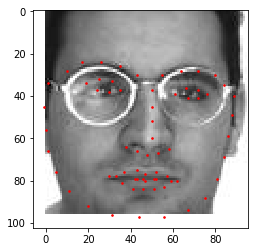

In [45]:
%matplotlib inline
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('dataset/train/face_landmarks.csv')

n = 500
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image, cmap='gray')
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join('dataset/train/', img_name)),
               landmarks)
plt.show()

Dataset class
-------------

``torch.utils.data.Dataset`` -- абстрактный класс представляющий датасет. 


Для нового класса датасета нужно отнаследоваться от класса Dataset и реализовать следующие функции:


- ``__len__``  так что len(dataset) возвратит длину датасета.


- ``__getitem__``  - индексация, такая что dataset[i] возвратит i-й элемент




In [46]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (96, 96) (68, 2)


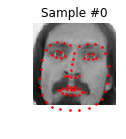

1 (96, 96) (68, 2)


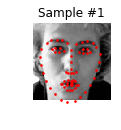

2 (96, 96) (68, 2)


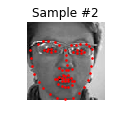

3 (96, 96) (68, 2)


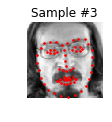

In [47]:
face_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                    root_dir='dataset/train')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

Преобразования (transformations)
----------

Так как часто не все изображения одинакового размера, нужно уметь автоматически приводить их к таковому. Также полезно уметь увеличивать размер датасета (аугментация).

-  ``Rescale``: приведение к определенному размеру
-  ``RandomCrop``: случайный кроп изображения. (вариант аугментации)
-  ``ToTensor``: приведение к тензору




In [59]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

Приведем изображение к 68x68 и вырежем случайную область 60x60

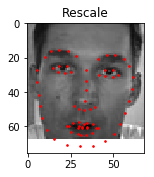

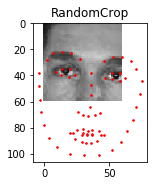

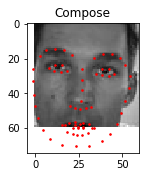

In [55]:
scale = Rescale(68)
crop = RandomCrop(60)
composed = transforms.Compose([Rescale(68),
                               RandomCrop(60)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

## Итерирование по датасету

In [60]:
transformed_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                           root_dir='dataset/train/',
                                           transform=transforms.Compose([
                                               Rescale(68),
                                               RandomCrop(60),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([60, 60]) torch.Size([68, 2])
1 torch.Size([60, 60]) torch.Size([68, 2])
2 torch.Size([60, 60]) torch.Size([68, 2])
3 torch.Size([60, 60]) torch.Size([68, 2])


Для эффективного обучения хотим иметь еще следующие возможности:

-  Батчи
-  Шаффлы
-  Параллельная загрузка

``torch.utils.data.DataLoader`` итератор, который делает все что нам нужно. 

0
1
2
3


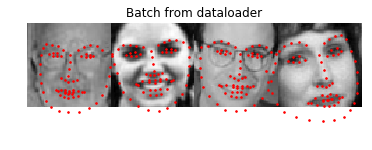

In [63]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose(1,0,2).reshape(im_size, -1), cmap="gray")

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                    landmarks_batch[i, :, 1].numpy(),
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch)

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [1]:
import pandas as pd

In [64]:
pd.read_csv("dataset/train/face_landmarks.csv")

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0.jpeg,10,43,9,53,8,64,8,74,10,...,47,78,56,80,47,77,43,77,39,77
1,1.jpeg,9,32,8,42,9,52,12,62,15,...,48,74,53,76,48,77,46,77,42,77
2,10.jpeg,4,34,5,44,6,54,9,64,14,...,50,70,56,72,50,72,47,72,43,72
3,100.jpeg,12,41,13,51,15,60,17,70,21,...,54,72,61,71,54,73,51,73,47,73
4,1000.jpeg,8,46,9,55,10,64,12,73,16,...,54,65,62,70,54,72,50,72,46,71
5,1001.jpeg,10,38,12,48,14,58,16,66,19,...,51,68,60,71,52,76,48,76,44,76
6,1002.jpeg,5,30,5,42,6,53,7,63,9,...,49,79,57,81,49,81,44,81,39,80
7,1003.jpeg,11,36,13,46,15,56,18,66,21,...,54,73,62,73,54,77,50,77,45,77
8,1004.jpeg,8,31,8,41,9,51,10,61,14,...,48,76,55,77,48,75,44,75,41,73
9,1005.jpeg,15,36,16,45,17,53,19,61,22,...,48,66,54,69,48,70,45,70,42,69
